<a href="https://colab.research.google.com/github/sparks-baird/CrabNet/blob/main/examples/crabnet_basic_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CrabNet Basic Usage

Basic usage of CrabNet regression on elasticity dataset. If you run this on a larger dataset (e.g. by setting `get_data(..., Dummy=False)`), then we recommend that you use Colab's GPU capabilities via:

```
(Menu bar) --> Edit --> Notebook Settings --> Hardware Accelerator --> GPU
```

## Installation

In [1]:
!pip install -U crabnet

     |████████████████████████████████| 90.3 MB 60 kB/s 


## Imports

In [2]:
from crabnet.crabnet_ import get_data
from crabnet.data.materials_data import elasticity
from crabnet.crabnet_ import CrabNet

## Data

In [3]:
train_df, val_df = get_data(elasticity, "train.csv", dummy=True)

## CrabNet


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 0 parameters



Generating EDM: 100%|██████████| 64/64 [00:00<00:00, 37360.54formulae/s]

loading data with up to 4 elements in the formula


training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 16/16 [00:00<00:00, 52428.80formulae/s]


loading data with up to 4 elements in the formula
stepping every 10 training passes, cycling lr every 10 epochs
checkin at 20 epochs to match lr scheduler
Epoch: 0/40 --- train mae: 19.6 val mae: 23.3


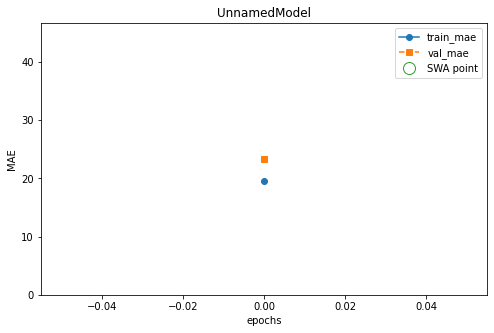

Epoch: 19/40 --- train mae: 15 val mae: 24.1


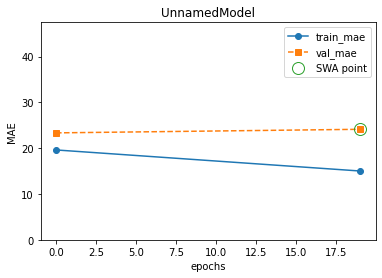

Epoch: 39/40 --- train mae: 12.7 val mae: 22.7


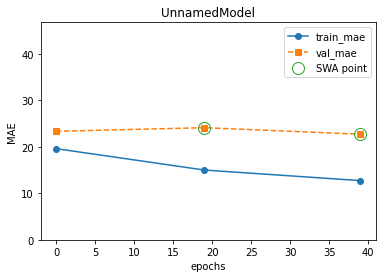

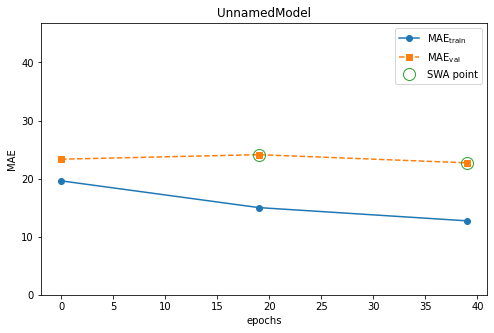

Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


Generating EDM: 100%|██████████| 20/20 [00:00<00:00, 23366.60formulae/s]

loading data with up to 4 elements in the formula


In [7]:
%matplotlib inline
cb = CrabNet(mat_prop="elasticity", epochs=40)
cb.fit(train_df)
val_pred, val_sigma = cb.predict(val_df, return_uncertainty=True)